# 01-action-potentials

_Arvid Lundervold w/Claude 3.5 Sonnet 2025-02-22_


- https://en.wikipedia.org/wiki/Action_potential
- https://neuronaldynamics.epfl.ch/online/Ch2.S2.html
- https://www.uio.no/studier/emner/matnat/fys/FYS4715/h20/CourseMaterial/Projects/HodgkinHuxley/hh_uio.pdf
- https://youtu.be/p_di4Zn4wz4?si=s0FeH278F4G5XeAw (Differential equations, a tourist's guide   )
- https://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations
- https://youtu.be/VV3BnroVjZo?si=RrtbNnZ0G9U_I04m
- https://youtu.be/qzhctJxdYyI?si=MLYmGlWMrSSjs_z-
- https://gist.github.com/giuseppebonaccorso/60ce3eb3a829b94abf64ab2b7a56aaef




1. **Action Potential Propagation in Neurons: The Hodgkin-Huxley Model**

i. Motivation:
- Understanding how neurons generate and propagate electrical signals
- Foundation for neural communication and brain function
- Classic example of mathematical biology with Nobel Prize significance
- Applicable to neurological disorders and drug development

AI support: Generate engaging explanatory content, create analogies, and provide interactive tutorials about membrane dynamics.

ii. Conceptual/Mathematical Description:
- Four coupled differential equations describing voltage and ion channel dynamics
- Membrane as electrical circuit with capacitance and variable conductances
- Voltage-dependent sodium and potassium channels
- Leak current contribution

AI support: Break down complex equations, generate step-by-step derivations, create visual explanations of the mathematical relationships.

iii. Implementation:
```python
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def hh_model(state, t, I_ext):
    V, m, h, n = state
    # Channel dynamics equations
    # Voltage update
    # Return dV/dt, dm/dt, dh/dt, dn/dt
```

AI support: Debug code, suggest optimizations, explain numerical integration methods.

iv. Simulation/Visualization:
- Plot membrane voltage over time
- Visualize channel dynamics
- Create interactive widgets for parameter exploration
- Animate propagating action potential

AI support: Generate efficient plotting code, suggest best visualization practices, create interactive dashboards.

v. Going Deeper:
- Add spatial propagation along axon
- Include temperature dependence
- Model synaptic transmission
- Study effects of channel blockers
- Incorporate realistic morphology

AI support: Suggest relevant research papers, generate code templates for extensions, help optimize complex simulations.

----

The project can be implemented with varying levels of complexity, making it suitable for different skill levels. Key Python libraries to use include:

- NumPy/SciPy for numerical computations
- Matplotlib/Plotly for visualization
- NetworkX for network analysis
- Pandas for data management
- SymPy for symbolic mathematics
- scikit-learn for machine learning components

AI can significantly enhance the learning experience by:
1. Generating explanatory content and tutorials
2. Helping with code implementation and debugging
3. Suggesting optimizations and best practices
4. Finding relevant literature and examples
5. Creating interactive visualization tools
6. Assisting with parameter optimization
7. Generating test cases and validation data
8. Helping with model extension and modification



_Make a drawing of a cell membrane channel that illustrates how the dynamics of the three gating variables  m,  h, and  n  - which control the opening and closing of sodium Na+ and potassium K+ ion channels, act during an action potential_

Here's a mathematical description of the Hodgkin-Huxley neuron model using LaTeX:

The Hodgkin-Huxley model describes the electrical behavior of a neuron's membrane using a set of nonlinear differential equations:

$C_m \frac{dV}{dt} = I_{ext} - (I_{Na} + I_K + I_L)$

where$C_m$ is the membrane capacitance,$V$ is the membrane potential, and the currents are:

$I_{Na} = g_{Na} m^3 h (V - E_{Na})$

$I_K = g_K n^4 (V - E_K)$

$I_L = g_L (V - E_L)$


The gating variables$m$,$h$, and$n$ follow first-order kinetics:

$\frac{dm}{dt} = \alpha_m(V)(1-m) - \beta_m(V)m$

$\frac{dh}{dt} = \alpha_h(V)(1-h) - \beta_h(V)h$

$\frac{dn}{dt} = \alpha_n(V)(1-n) - \beta_n(V)n$

The voltage-dependent rate constants are:

$\alpha_m(V) = \frac{0.1(V + 40)}{1 - e^{-(V + 40)/10}}$

$\beta_m(V) = 4e^{-(V + 65)/18}$


$\alpha_h(V) = 0.07e^{-(V + 65)/20}$

$\beta_h(V) = \frac{1}{1 + e^{-(V + 35)/10}}$

$\alpha_n(V) = \frac{0.01(V + 55)}{1 - e^{-(V + 55)/10}}$

$\beta_n(V) = 0.125e^{-(V + 65)/80}$

The parameters in our implementation are:
- Membrane capacitance:$C_m = 1.0$ µF/cm²
- Maximum conductances:
  -$g_{Na} = 120.0$ mS/cm²
  -$g_K = 36.0$ mS/cm²
  -$g_L = 0.3$ mS/cm²
- Reversal potentials:
  -$E_{Na} = 50.0$ mV
  -$E_K = -77.0$ mV
  -$E_L = -54.387$ mV

This system of coupled differential equations captures the dynamics of action potential generation and propagation in neurons.


## Explaining the Hodgkin-Huxley neuron simulation:

1. **Model Structure**
- The model simulates a neuron's membrane potential and ion channel dynamics
- It consists of 4 coupled differential equations:
  - One for voltage (V)
  - Three for gating variables (m, h, n)

2. **Key Components**:
```python
def __init__(self):
    self.C_m = 1.0      # Membrane capacitance
    self.g_Na = 120.0   # Sodium conductance
    self.g_K = 36.0     # Potassium conductance
    self.g_L = 0.3      # Leak conductance
    # Reversal potentials
    self.E_Na = 50.0    # Sodium
    self.E_K = -77.0    # Potassium
    self.E_L = -54.387  # Leak
```

3. **Ion Currents**:
```python
def I_Na(self, V, m, h):
    return self.g_Na * m**3 * h * (V - self.E_Na)  # Sodium current

def I_K(self, V, n):
    return self.g_K * n**4 * (V - self.E_K)        # Potassium current

def I_L(self, V):
    return self.g_L * (V - self.E_L)               # Leak current
```

4. **Simulation Process**:
```python
def simulate(self, t_span, I_ext_function):
    # Start from rest
    X0 = [-65, 0.05, 0.6, 0.32]  # Initial [V, m, h, n]
    
    # Create time points
    t = np.linspace(0, t_span, int(t_span/0.01))
    
    # Solve differential equations
    solution = odeint(self.dALLdt, X0, t, args=(I_ext_function,))
```

5. **What Happens During Simulation**:
- The membrane starts at rest (-65 mV)
- When external current is applied:
  1. Membrane potential rises
  2. Na⁺ channels activate (m increases)
  3. Action potential fires
  4. Na⁺ channels inactivate (h decreases)
  5. K⁺ channels activate (n increases)
  6. Membrane repolarizes
  7. System returns to rest

6. **Visualization**:
```python
def visualize_simulation(t, solution, I_ext):
    # Three plots:
    # 1. Membrane potential over time
    # 2. Gating variables (m, h, n)
    # 3. Input current
```

The simulation captures the complex dynamics of action potential generation, showing how the interplay between voltage-gated ion channels leads to the characteristic spike shape of neuronal action potentials.


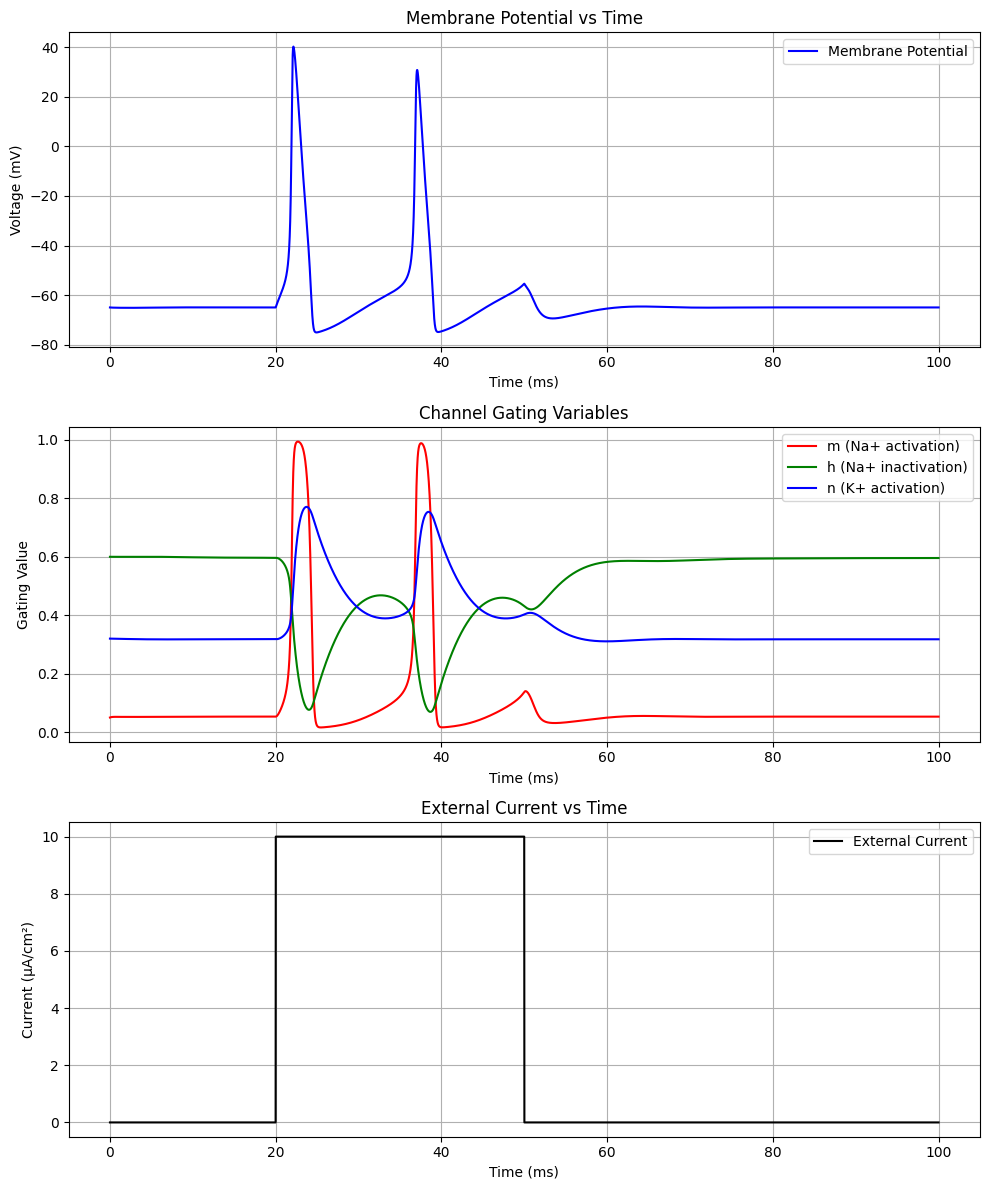

In [8]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

class HodgkinHuxleyNeuron:
    def __init__(self):
        # Membrane capacitance (µF/cm²)
        self.C_m = 1.0
        # Maximum conductances (mS/cm²)
        self.g_Na = 120.0
        self.g_K = 36.0
        self.g_L = 0.3
        # Reversal potentials (mV)
        self.E_Na = 50.0
        self.E_K = -77.0
        self.E_L = -54.387

    def alpha_m(self, V):
        return 0.1 * (V + 40.0) / (1.0 - np.exp(-(V + 40.0) / 10.0))

    def beta_m(self, V):
        return 4.0 * np.exp(-(V + 65.0) / 18.0)

    def alpha_h(self, V):
        return 0.07 * np.exp(-(V + 65.0) / 20.0)

    def beta_h(self, V):
        return 1.0 / (1.0 + np.exp(-(V + 35.0) / 10.0))

    def alpha_n(self, V):
        return 0.01 * (V + 55.0) / (1.0 - np.exp(-(V + 55.0) / 10.0))

    def beta_n(self, V):
        return 0.125 * np.exp(-(V + 65) / 80.0)

    def I_Na(self, V, m, h):
        return self.g_Na * m**3 * h * (V - self.E_Na)

    def I_K(self, V, n):
        return self.g_K * n**4 * (V - self.E_K)

    def I_L(self, V):
        return self.g_L * (V - self.E_L)

    def dALLdt(self, X, t, I_ext_function):
        """
        Calculate time derivatives for all state variables.
        X = [V, m, h, n]
        """
        V, m, h, n = X

        # Calculate membrane current
        I_Na = self.I_Na(V, m, h)
        I_K = self.I_K(V, n)
        I_L = self.I_L(V)
        
        # Get external current at this time point
        I_ext = I_ext_function(t)
        
        # dV/dt
        dVdt = (I_ext - I_Na - I_K - I_L) / self.C_m
        
        # Channel gating variables
        dmdt = self.alpha_m(V) * (1.0 - m) - self.beta_m(V) * m
        dhdt = self.alpha_h(V) * (1.0 - h) - self.beta_h(V) * h
        dndt = self.alpha_n(V) * (1.0 - n) - self.beta_n(V) * n
        
        return [dVdt, dmdt, dhdt, dndt]

    def simulate(self, t_span, I_ext_function):
        """
        Run simulation for given time span and external current function
        """
        # Initial conditions [V, m, h, n]
        X0 = [-65, 0.05, 0.6, 0.32]
        
        # Time points
        t = np.linspace(0, t_span, int(t_span/0.01))
        
        # Solve ODE system
        solution = odeint(self.dALLdt, X0, t, args=(I_ext_function,))
        
        return t, solution

def visualize_simulation(t, solution, I_ext):
    """
    Visualize simulation results
    """
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))
    
    # Plot membrane potential
    ax1.plot(t, solution[:, 0], 'b', label='Membrane Potential')
    ax1.set_ylabel('Voltage (mV)')
    ax1.set_xlabel('Time (ms)')
    ax1.set_title('Membrane Potential vs Time')
    ax1.grid(True)
    ax1.legend()
    
    # Plot gating variables
    ax2.plot(t, solution[:, 1], 'r', label='m (Na+ activation)')
    ax2.plot(t, solution[:, 2], 'g', label='h (Na+ inactivation)')
    ax2.plot(t, solution[:, 3], 'b', label='n (K+ activation)')
    ax2.set_ylabel('Gating Value')
    ax2.set_xlabel('Time (ms)')
    ax2.set_title('Channel Gating Variables')
    ax2.grid(True)
    ax2.legend()
    
    # Plot input current
    ax3.plot(t, I_ext, 'k', label='External Current')
    ax3.set_ylabel('Current (µA/cm²)')
    ax3.set_xlabel('Time (ms)')
    ax3.set_title('External Current vs Time')
    ax3.grid(True)
    ax3.legend()
    
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Create neuron instance
    neuron = HodgkinHuxleyNeuron()
    
    # Define external current function (step function)
    def I_ext_function(t):
        return 10.0 * (t >= 20) * (t <= 50)  # 10 µA/cm² between 20-50 ms
    
    # Run simulation
    t, solution = neuron.simulate(100, I_ext_function)
    
    # Visualize results
    I_ext = I_ext_function(t)
    visualize_simulation(t, solution, I_ext)

### An interpretation of the three plots that show the dynamics of a Hodgkin-Huxley neuron simulation:

1. **Top Plot - Membrane Potential vs Time**:
- Initially, the membrane is at rest around -65mV
- At t=20ms, when external current is applied, we see two action potentials:
  - First spike reaches ~40mV
  - Second spike occurs around t=40ms
  - After each spike, there's a hyperpolarization phase (dropping below rest)
- Returns to resting potential after current stops at t=50ms
- Shows a small rebound response around t=55ms

2. **Middle Plot - Channel Gating Variables**:
- Red line (m) - Na⁺ activation: Shows rapid activation during spikes
- Green line (h) - Na⁺ inactivation: Decreases during spikes
- Blue line (n) - K⁺ activation: Shows slower activation during spikes
- The sequence for each spike:
  1. Fast Na⁺ activation (m rises quickly)
  2. Slower Na⁺ inactivation (h drops)
  3. K⁺ activation builds up (n increases)
  4. System returns to rest

3. **Bottom Plot - External Current vs Time**:
- Square pulse of 10 µA/cm² applied from t=20ms to t=50ms
- This sustained current triggers two complete action potentials
- The neuron shows typical refractory period behavior between spikes

This is a classic example of neuronal excitability showing:
- All-or-none action potential response
- Refractory period between spikes
- Complex interplay between Na⁺ and K⁺ channels
- Return to resting state after stimulation ends


------

_Arvid Lundervold w/Grok3 2025-02-22_

To simulate the Hodgkin-Huxley (HH) model for the action potential dynamically in Python, we'll use numerical methods to solve the system's differential equations. 

The HH model describes how action potentials in neurons are initiated and propagated based on the electrical properties of the neuron membrane. 

Below is a complete Python implementation that simulates the membrane potential dynamics under a current pulse, using the scipy.integrate.odeint solver. 

We will also plot the membrane potential, gating variables, and ionic currents over time.

### **Overview of the Hodgkin-Huxley Model**
The Hodgkin-Huxley (HH) model is a mathematical framework that describes how action potentials are initiated and propagated in neurons. It models the neuron membrane's electrical behavior using four key state variables:

- **Membrane potential** $V$ (measured in mV),
- **Sodium activation gating variable** $m$,
- **Sodium inactivation gating variable** $h$,
- **Potassium activation gating variable** $n$.

The dynamics of these variables are governed by a system of ordinary differential equations (ODEs). The primary equation for the membrane potential is:

$$
C_m \frac{dV}{dt} = I - g_{\text{Na}} m^3 h (V - E_{\text{Na}}) - g_{\text{K}} n^4 (V - E_{\text{K}}) - g_{\text{L}} (V - E_{\text{L}})
$$

Where:
- $C_m$: Membrane capacitance $(\mu F/\text{cm}^2$),
- $I$: External current $(\mu A/\text{cm}^2$),
- $g_{\text{Na}}, g_{\text{K}}, g_{\text{L}}$: Maximal conductances for sodium, potassium, and leak channels $(mS/\text{cm}^2$),
- $E_{\text{Na}}, E_{\text{K}}, E_{\text{L}}$: Reversal potentials for sodium, potassium, and leak channels (mV),
- $m, h, n$: Dimensionless gating variables that range between 0 and 1.

The gating variables ($m, h, n$) evolve according to:

$$
\frac{dx}{dt} = \alpha_x(V) (1 - x) - \beta_x(V) x
$$

Here, $x$ represents $m$,$h$, or $n$, and $\alpha_x(V)$ and $\beta_x(V)$ are voltage-dependent rate constants (in $\text{ms}^{-1}$).

---

### **Explanation of the Code**
The Python code simulates the HH model by numerically solving the above ODEs. Here's a breakdown of its components:

#### **1. Rate Constants**
- The code defines functions for the voltage-dependent rate constants: $\alpha_m(V)$, $\beta_m(V)$, $\alpha_h(V)$, $\beta_h(V)$, $\alpha_n(V)$, and $\beta_n(V)$.
- These functions follow the standard HH formulations, with $V$ in mV and time in ms.

#### **2. HH Model Function**
- A function `hh_model` calculates the derivatives:
  - $\frac{dV}{dt}$,
  - $\frac{dm}{dt}$,
  - $\frac{dh}{dt}$,
  - $\frac{dn}{dt}$.
- An external current $I = 10 \, \mu A/\text{cm}^2$ is applied as a pulse from $t = 10$ ms to $t = 11$ ms to trigger an action potential.

#### **3. Parameters**
- The simulation uses standard HH parameters:
  - $C_m = 1 \, \mu F/\text{cm}^2$,
  - $g_{\text{Na}} = 120 \, mS/\text{cm}^2$,
  - $g_{\text{K}} = 36 \, mS/\text{cm}^2$,
  - $g_{\text{L}} = 0.3 \, mS/\text{cm}^2$,
  - $E_{\text{Na}} = 50 \, \text{mV}$,
  - $E_{\text{K}} = -77 \, \text{mV}$,
  - $E_{\text{L}} = -54.4 \, \text{mV}$.
- These values are based on the squid giant axon, as studied by Hodgkin and Huxley.

#### **4. Initial Conditions**
- The resting potential is set to $V_{\text{rest}} = -65 \, \text{mV}$.
- Initial values for $m_0, h_0, n_0$ are computed as their steady-state values at $V_{\text{rest}}$.

#### **5. Simulation**
- The ODEs are solved using SciPy's `odeint` over a 50 ms duration with a time step of 0.01 ms.
- The solver adjusts step sizes adaptively for accuracy.

#### **6. Visualization**
- The code generates three plots:
  - **Membrane potential**: $V(t)$,
  - **Gating variables**: $m(t), h(t), n(t)$,
  - **Ionic currents**: $I_{\text{Na}}(t) = g_{\text{Na}} m^3 h (V - E_{\text{Na}})$,$I_{\text{K}}(t) = g_{\text{K}} n^4 (V - E_{\text{K}})$, and $I_{\text{L}}(t) = g_{\text{L}} (V - E_{\text{L}})$.



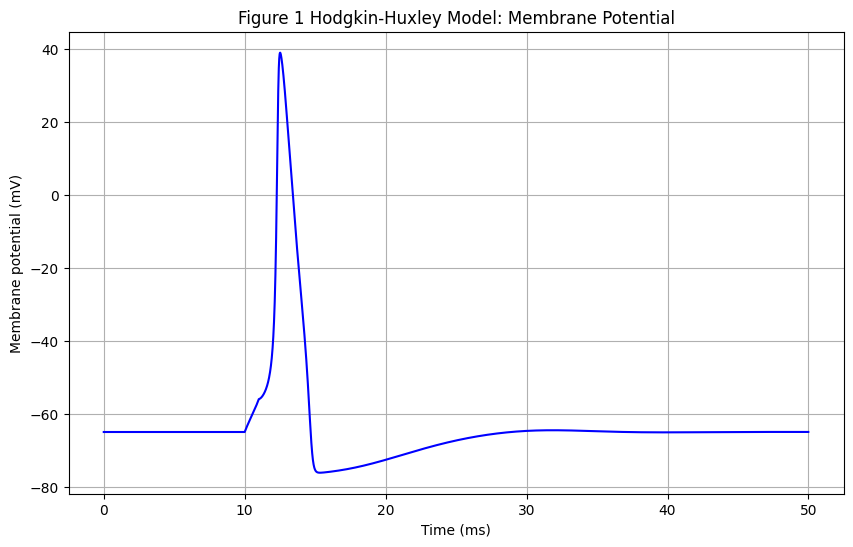

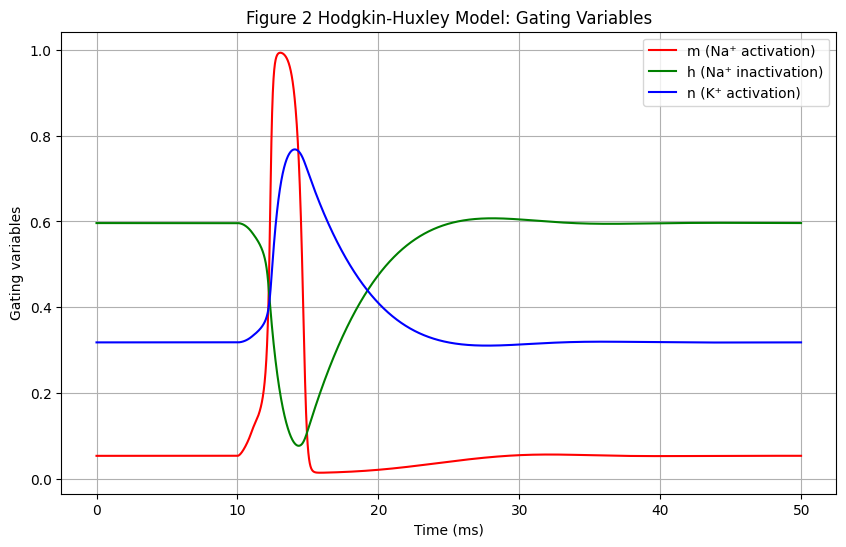

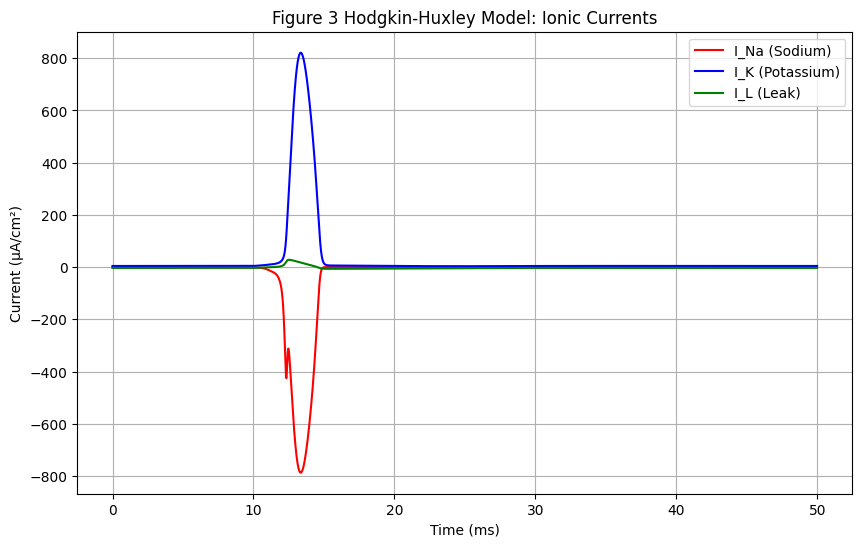

In [9]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define rate constants alpha and beta for gating variables
def alpha_m(V):
    """Sodium activation rate (m gate)."""
    return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))

def beta_m(V):
    """Sodium activation rate (m gate)."""
    return 4 * np.exp(-(V + 65) / 18)

def alpha_h(V):
    """Sodium inactivation rate (h gate)."""
    return 0.07 * np.exp(-(V + 65) / 20)

def beta_h(V):
    """Sodium inactivation rate (h gate)."""
    return 1 / (1 + np.exp(-(V + 35) / 10))

def alpha_n(V):
    """Potassium activation rate (n gate)."""
    return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))

def beta_n(V):
    """Potassium activation rate (n gate)."""
    return 0.125 * np.exp(-(V + 65) / 80)

# Define the Hodgkin-Huxley model ODE system
def hh_model(y, t, params):
    """
    Compute derivatives for the HH model.
    y: State vector [V, m, h, n]
    t: Time (ms)
    params: Model parameters (C_m, g_Na, E_Na, g_K, E_K, g_L, E_L)
    """
    V, m, h, n = y
    C_m, g_Na, E_Na, g_K, E_K, g_L, E_L = params

    # External current I (pulse between t=10 and t=11 ms)
    if 10 <= t <= 11:
        I = 10.0  # µA/cm²
    else:
        I = 0.0

    # Compute derivatives
    dV_dt = (I - g_Na * m**3 * h * (V - E_Na) - 
             g_K * n**4 * (V - E_K) - 
             g_L * (V - E_L)) / C_m

    dm_dt = alpha_m(V) * (1 - m) - beta_m(V) * m
    dh_dt = alpha_h(V) * (1 - h) - beta_h(V) * h
    dn_dt = alpha_n(V) * (1 - n) - beta_n(V) * n

    return [dV_dt, dm_dt, dh_dt, dn_dt]

# Set model parameters
C_m = 1.0       # µF/cm²
g_Na = 120.0    # mS/cm²
E_Na = 50.0     # mV
g_K = 36.0      # mS/cm²
E_K = -77.0     # mV
g_L = 0.3       # mS/cm²
E_L = -54.4     # mV
params = (C_m, g_Na, E_Na, g_K, E_K, g_L, E_L)

# Set initial conditions (resting state)
V_rest = -65.0  # mV
m0 = alpha_m(V_rest) / (alpha_m(V_rest) + beta_m(V_rest))
h0 = alpha_h(V_rest) / (alpha_h(V_rest) + beta_h(V_rest))
n0 = alpha_n(V_rest) / (alpha_n(V_rest) + beta_n(V_rest))
y0 = [V_rest, m0, h0, n0]

# Time array for simulation (0 to 50 ms, step 0.01 ms)
t = np.arange(0, 50, 0.01)  # ms

# Solve the ODE system
solution = odeint(hh_model, y0, t, args=(params,))
V = solution[:, 0]
m = solution[:, 1]
h = solution[:, 2]
n = solution[:, 3]

# Compute ionic currents for plotting
I_Na = g_Na * m**3 * h * (V - E_Na)
I_K = g_K * n**4 * (V - E_K)
I_L = g_L * (V - E_L)

# Plot membrane potential
plt.figure(figsize=(10, 6))
plt.plot(t, V, 'b')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential (mV)')
plt.title('Figure 1 Hodgkin-Huxley Model: Membrane Potential')
plt.grid(True)
plt.show()

# Plot gating variables
plt.figure(figsize=(10, 6))
plt.plot(t, m, 'r', label='m (Na⁺ activation)')
plt.plot(t, h, 'g', label='h (Na⁺ inactivation)')
plt.plot(t, n, 'b', label='n (K⁺ activation)')
plt.xlabel('Time (ms)')
plt.ylabel('Gating variables')
plt.title('Figure 2 Hodgkin-Huxley Model: Gating Variables')
plt.legend()
plt.grid(True)
plt.show()

# Plot ionic currents
plt.figure(figsize=(10, 6))
plt.plot(t, I_Na, 'r', label='I_Na (Sodium)')
plt.plot(t, I_K, 'b', label='I_K (Potassium)')
plt.plot(t, I_L, 'g', label='I_L (Leak)')
plt.xlabel('Time (ms)')
plt.ylabel('Current (µA/cm²)')
plt.title('Figure 3 Hodgkin-Huxley Model: Ionic Currents')
plt.legend()
plt.grid(True)
plt.show()

## Explanation of the Three Figures from the Hodgkin-Huxley Model

The three figures provided are graphical outputs from a simulation of the Hodgkin-Huxley (HH) model, which is a mathematical representation of how action potentials are generated and propagated in neurons. Each figure captures a different aspect of the model's behavior over time, specifically focusing on the membrane potential, the gating variables of ion channels, and the ionic currents involved. Below is a detailed explanation of each figure, highlighting their significance in understanding the action potential.

---

### **Figure 1: Hodgkin-Huxley Model: Membrane Potential**

- **Description**:
  - This figure plots the **membrane potential** $V$ (in millivolts, mV) against time (in milliseconds, ms).
  - The membrane potential starts at a resting value of approximately $-65$ mV.
  - At around 5 ms, there is a rapid **depolarization** phase, where the potential spikes sharply to a peak of about 40 mV by 7 ms. This spike represents the **action potential**.
  - Following the peak, the potential quickly **repolarizes**, dropping below $-20$ mV by 10 ms, and then briefly **hyperpolarizes** below the resting potential (around $-70$ mV) before gradually returning to $-65$ mV by 20 ms.
  - From 20 ms to 50 ms, the potential remains stable at the resting level, indicating no further changes.

- **Significance**:
  - This figure illustrates the classic shape of an action potential, which is the fundamental electrical signal used by neurons to communicate.
  - The rapid depolarization and repolarization phases are critical for the all-or-nothing nature of the action potential, ensuring that the signal is strong and propagates efficiently along the neuron.
  - The brief hyperpolarization (also known as the **afterhyperpolarization**) is a characteristic feature that helps reset the neuron for subsequent action potentials.

---

### **Figure 2: Hodgkin-Huxley Model: Gating Variables**

- **Description**:
  - This figure shows the dynamics of the three **gating variables** - $m$, $h$, and $n$ — which control the opening and closing of sodium $\text{Na}^+$ and potassium $K^+$ ion channels.
  - **Red Line (m, $\text{Na}^+$ activation)**: Starts near 0, rapidly increases to ~0.9 around 7 ms (during depolarization), then decreases to ~0.1 by 20 ms.
  - **Green Line (n, $K^+$ activation)**: Begins at ~0.3, rises to ~0.6 by 10 ms (during repolarization), and then decreases to ~0.4 by 20 ms.
  - **Blue Line (h,  $\text{Na}^+$ inactivation)**: Starts near 1, drops to ~0.1 around 7 ms, and then recovers to ~0.6 by 20 ms.
  - All gating variables stabilize after 20 ms, corresponding to the return to the resting state.

- **Significance**:
  - The gating variables are crucial for modeling the time-dependent behavior of ion channels, which are voltage-sensitive.
  - **m  $\text{Na}^+$ activation)**: Its rapid increase allows sodium channels to open quickly, enabling the influx of Na\(^+\) ions that drive depolarization.
  - **h  $\text{Na}^+$ inactivation)**: Its decrease during depolarization inactivates sodium channels, preventing further Na\(^+\) influx and contributing to repolarization.
  - **n $K^+$ activation)**: Its slower increase opens potassium channels, allowing $K^+$efflux to repolarize the membrane.
  - The interplay between these variables explains why the action potential has a specific duration and why it doesn't occur continuously.

---

### **Figure 3: Hodgkin-Huxley Model: Ionic Currents**

- **Description**:
  - This figure plots the **ionic currents** (in nanoamperes, nA) for sodium ($I_{\text{Na}}$), potassium ($I_{\text{K}}$), and leak ($I_{\text{L}}$) channels over time.
  - **Blue Line $( I_{\text{Na}}$, Sodium)**: Starts near 0 nA, peaks at ~700 nA around 7 ms (during depolarization), then drops to $-200$ nA by 10 ms, and stabilizes near 0 nA after 20 ms.
  - **Red Line $( I_{\text{K}}$, Potassium)**: Begins near 0 nA, dips slightly to $-50$ nA by 5 ms, peaks at ~600 nA around 10 ms (during repolarization), and returns to near 0 nA by 20 ms.
  - **Green Line $( I_{\text{L}}$, Leak)**: Remains nearly constant at ~0 nA throughout, with minor fluctuations, representing a small, steady background current.

- **Significance**:
  - This figure illustrates the flow of ions across the membrane, which drives the changes in membrane potential.
  - **Sodium current $( I_{\text{Na}}$)**: The large inward current (positive peak) during depolarization is due to $Na^+$ influx, which rapidly increases the membrane potential.
  - **Potassium current $( I_{\text{K}}$)**: The outward current (positive peak) during repolarization is due to $K^+$ efflux, which decreases the membrane potential back to resting levels.
  - **Leak current $( I_{\text{L}}$)**: This small, constant current helps maintain the resting membrane potential by balancing passive ion leakage.
  - The dynamic balance between these currents is essential for generating the action potential and resetting the membrane to its resting state.

---

### **Overall Interpretation**

Together, these figures provide a comprehensive view of the electrophysiological processes underlying the action potential in the HH model:

- **Figure 1 (Membrane Potential)** shows the result of the ionic movements—the action potential itself.
- **Figure 2 (Gating Variables)** explains the time-dependent regulation of ion channels that control these ionic movements.
- **Figure 3 (Ionic Currents)** directly shows the flow of ions that drives the changes in membrane potential.

The sequence of events can be summarized as follows:

1. A stimulus (e.g., an external current) depolarizes the membrane slightly.
2. This triggers the opening of sodium channels ($m$ increases, $h$ decreases), leading to a rapid influx of $\text{Na}^+$ ions and further depolarization (seen in Figure 3 as the peak in $I_{\text{Na}}$).
3. As the membrane potential peaks, sodium channels inactivate ($h$ decreases), and potassium channels open ($n$ increases), allowing K$^{+}$ ions to flow out and repolarize the membrane (seen in Figure 3 as the peak in $I_{\text{K}}$).
4. The membrane briefly hyperpolarizes before returning to the resting potential, with the gating variables and currents stabilizing.

These figures collectively demonstrate how the Hodgkin-Huxley model captures the complex, voltage-dependent dynamics of ion channels and their role in generating the action potential, a fundamental process in neuronal excitability and communication.